In [1]:
import datetime as dt
import time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import seaborn as sns
%matplotlib inline

In [18]:
pd.__version__

'1.0.3'

## The next cell loads data from the John Hopkins github repository on the Corona virus: https://github.com/CSSEGISandData/COVID-19

If you want to run this code, make sure that the paths below are correctly pointing to a copy of the John Hopkins repository.

In [6]:
today = dt.date.today(); today

datetime.date(2020, 4, 3)

In [189]:
#Load data locally
data_confirmed = pd.read_csv('../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
data_deaths = pd.read_csv('../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
data_recovered = pd.read_csv('../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
#Load data from Internet
#data_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#data_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
#data_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

data = [data_confirmed, data_deaths, data_recovered]

#mask = data_confirmed_orig.drop(["Lat","Long"], axis = 1).sum(numeric_only=True, axis=1)>100
for i in range(len(data)):
    #d.loc[d["Province/State"].notna(), "Country/Region"] += ' ' + d.loc[d["Province/State"].notna(), "Province/State"]
    try:
        data[i].drop(["Province/State", "Lat", "Long"] ,axis = 1, inplace=True)
        data[i]=data[i].groupby('Country/Region').sum()
    except KeyError:
        pass
    cols = data[i].columns
    new_cols = map(lambda x: dt.date(2020,*[int(x.split('/')[k]) for k in [0,1]]), cols)
    #d.drop([i for i in range(d.shape[0]) if mask[i]!=True], inplace=True) #Drops countries with less than 100 cases
    data[i].set_axis(list(new_cols), axis=1, inplace=True)
    data[i].reset_index(inplace=True)
    if i == 0:
        small_infection_number = [j for j in range(data[0].shape[0]) if data[0].iloc[j,-1]<200]
    data[i].drop(small_infection_number,inplace=True)
    data[i].reset_index(inplace=True)
    data[i].drop('index',axis=1,inplace=True)
    #d.set_axis(range(len(d.index)), axis=0, inplace=True)

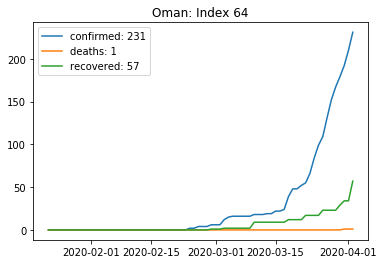

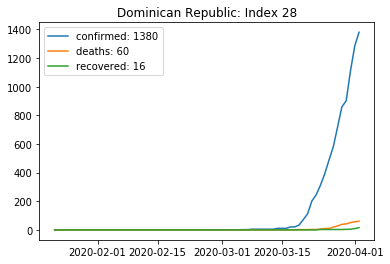

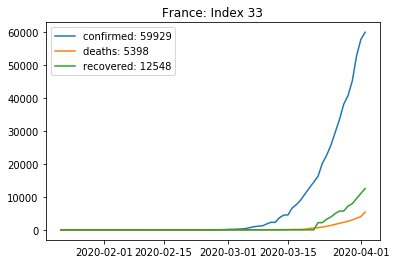

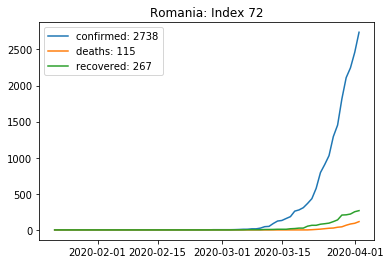

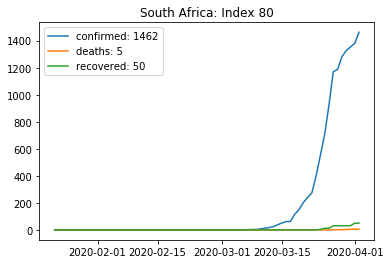

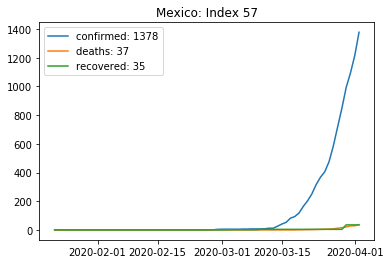

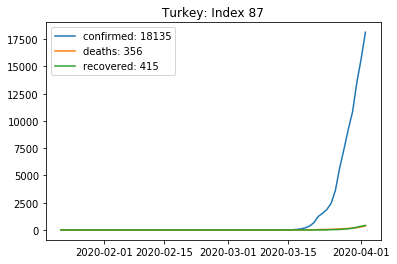

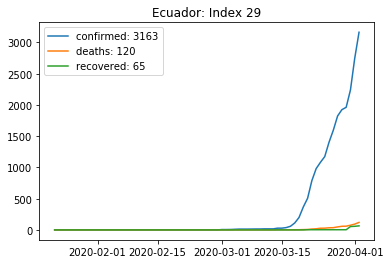

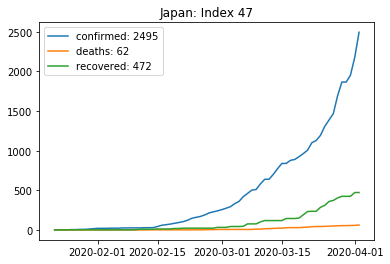

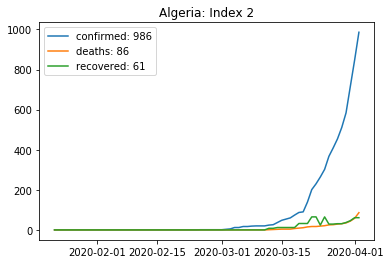

In [9]:
sample_size = 10
sample = random.sample(range(data[0].shape[0]),sample_size)
for index in sample:
    country = data[0].iloc[index][0]
    df = pd.DataFrame([d.iloc[index][1:] for d in data], index=[0,1,2]).fillna(0)
    total = df.iloc[:,-1]
    df.set_axis(["confirmed: {}".format(total.loc[0]),"deaths: {}".format(total[1]),"recovered: {}".format(total[2])], inplace=True, axis=0)
    df.transpose().plot(title=country + ': Index {}'.format(index))


## Let's divide the data by population size. 
We can either add the population value (from the year 2016) to the data, as is demonstrated below or just find the population_data when we need it.

In [338]:
population_data = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')

In [339]:
countries = data[0]['Country/Region']

In [340]:
population_data = population_data.drop([i for i in range(population_data.shape[0]) if population_data.iloc[i]['Year']<2016])

In [341]:
population_data = population_data.set_index('Country Name').drop(['Year','Country Code'],axis=1)

In [342]:
#Some Countries in population_data have other names
for i,c in countries.iteritems():
    if c not in population_data.index.values: print(c)

Czechia
Diamond Princess
Egypt
Iran
Korea, South
North Macedonia
Russia
Slovakia
Taiwan*
US


In [343]:
population_data.loc[population_data.index.str.contains('Mace')]

,Value
Country Name,
"Macedonia, FYR",2081206.0


In [344]:
population_data = population_data.rename(index={'Macedonia, FYR':'North Macedonia','Iran, Islamic Rep.':'Iran','Egypt, Arab Rep.':'Egypt','Czech Republic':'Czechia','United States':'US', 'Russian Federation':'Russia', 'Korea, Rep.' : 'Korea, South', 'Slovak Republic':'Slovakia'})

In [345]:
population_data = population_data.drop([population_data.index[i] for i in range(population_data.shape[0]) if population_data.index[i] not in countries.values])

In [346]:
taiwan_population = 23574274; diamond_princess_population = 3600

In [347]:
population_data.loc['Taiwan*'] = taiwan_population
population_data.loc['Diamond Princess'] = diamond_princess_population

In [348]:
population_data

,Value
Country Name,
Afghanistan,34656032.0
Albania,2876101.0
Algeria,40606052.0
Andorra,77281.0
Argentina,43847430.0
...,...
Uruguay,3444006.0
Uzbekistan,31848200.0
Vietnam,92701100.0


In [196]:
pd.merge(data[0], population_data,  how='inner', on=None, left_on='Country/Region', right_on='Country Name',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

,Country/Region,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,Value
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,34656032.0
1,Albania,0,0,0,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,2876101.0
2,Algeria,0,0,0,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,40606052.0
3,Andorra,0,0,0,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,77281.0
4,Argentina,0,0,0,0,0,0,0,0,0,...,387,502,589,690,745,820,1054,1054,1133,43847430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,United Arab Emirates,0,0,0,0,0,0,0,4,4,...,333,333,405,468,570,611,664,814,1024,9269612.0
81,United Kingdom,0,0,0,0,0,0,0,0,0,...,9640,11812,14745,17312,19780,22453,25481,29865,34173,65637239.0
82,Uruguay,0,0,0,0,0,0,0,0,0,...,189,217,238,274,304,310,338,338,350,3444006.0
83,Uzbekistan,0,0,0,0,0,0,0,0,0,...,60,75,88,104,144,149,172,181,205,31848200.0


In [166]:
def divide_by_population(name, values):
    

0      34656032.0
1       2876101.0
2      40606052.0
3         77281.0
4      28813463.0
          ...    
226    31848200.0
227    92701100.0
228     4551566.0
229    16591390.0
230    16150362.0
Name: Value, Length: 231, dtype: float64


In [171]:
data_confirmed.iloc[0,1:]

1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0
          ... 
3/29/20    120
3/30/20    170
3/31/20    174
4/1/20     237
4/2/20     273
Name: 0, Length: 72, dtype: object

In [147]:
data_confirmed.iloc[:,1].dtype

dtype('int64')

In [66]:
population_data.loc[population_data['Country Name']=='Zimbabwe']

Index(['Country Name', 'Country Code', 'Year', 'Value'], dtype='object')

In [10]:
L = ["Austria", "Ireland", "Germany", "Italy", "US"]
over_100 = [] #date at which country had over 100 infections

In [329]:
start_date+dt.timedelta(1)

datetime.date(2020, 3, 16)

Austria
Latest available data from date 2020-04-02: 11129
Reg score 0.9566311398019589
Reg coeff [[0.1466245]]
Intercept [7.01105741]
Prediction for 2020-04-02:  [[15526.42138905]]
Actual value:  7    11129.0
Name: 2020-04-02, dtype: float64
Prediction for 2020-04-03:  [[17978.33966562]]
Ireland
Latest available data from date 2020-04-02: 3849
Reg score 0.9420355232228106
Reg coeff [[0.18366906]]
Intercept [5.3076533]
Prediction for 2020-04-02:  [[5506.56545201]]
Actual value:  44    3849.0
Name: 2020-04-02, dtype: float64
Prediction for 2020-04-03:  [[6616.78867971]]
Germany
Latest available data from date 2020-04-02: 84794
Reg score 0.9644026358818026
Reg coeff [[0.14516628]]
Intercept [8.97825934]
Prediction for 2020-04-02:  [[108147.60567145]]
Actual value:  34    84794.0
Name: 2020-04-02, dtype: float64
Prediction for 2020-04-03:  [[125043.70150106]]
Italy
Latest available data from date 2020-04-02: 115242
Reg score 0.9623723649947307
Reg coeff [[0.08569912]]
Intercept [10.2727982

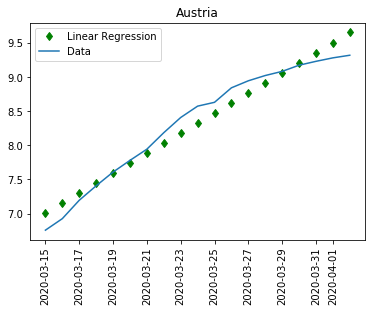

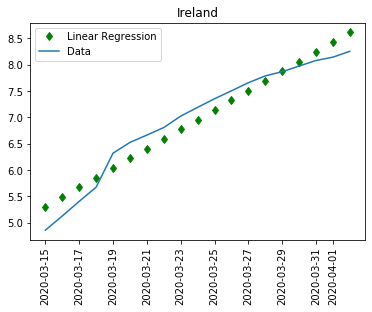

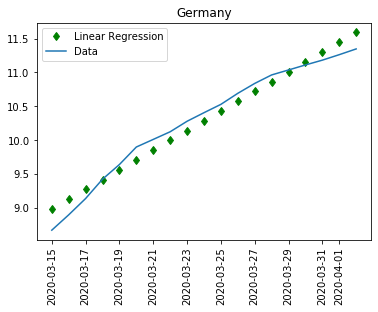

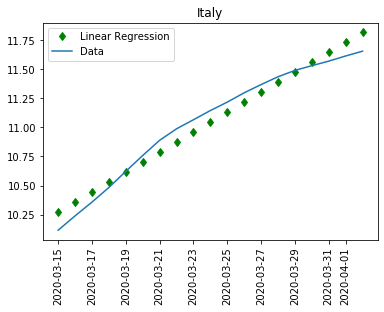

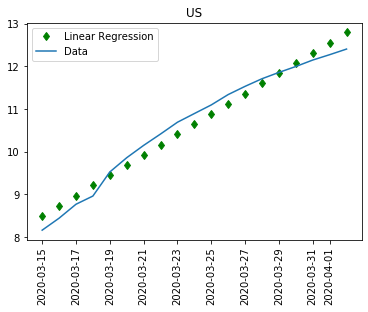

In [11]:
from sklearn.linear_model import LinearRegression
#import statsmodels.formula.api as sm
for country in L:
    y = data[0].loc[data[0]["Country/Region"]==country].iloc[:,1:].transpose()
    start_date = dt.date(2020,3,15)
    y = y.loc[start_date:today]
    y = y[y!=0].dropna().apply(np.log)
    #y = y.append(pd.Series({y.columns[0]:np.log(newest_data[country])}, name=pd.datetime(20,3,17)))
    X = np.array(range(y.shape[0])).reshape(-1,1)
    reg = LinearRegression()
    reg.fit(X,y)
    print(country)
    print('Latest available data from date {}: {}'.format(data[0].columns[-1], data[0].loc[data[0]["Country/Region"]==country].iloc[0,-1]))
    print('Reg score', reg.score(X, y))
    print('Reg coeff', reg.coef_)
    print('Intercept', reg.intercept_)
    plt.figure()
    plt.plot(y.index,(reg.predict(X)), 'gd', label='Linear Regression')
    plt.plot(y.index, (np.array(y)), label='Data')
    plt.title(country)
    plt.legend(loc="best")
    plt.xticks(rotation='vertical')
    print('Prediction for {}: '.format(data[0].columns[-1]), np.exp(reg.predict((X[-1]).reshape(-1,1))))
    print('Actual value: ', np.exp(y.iloc[-1]))
    print('Prediction for {}: '.format(data[0].columns[-1]+dt.timedelta(1)), np.exp(reg.predict((X[-1]+1).reshape(-1,1))))
    
    #reg.predict(np.array([[3, 5]]))
